# Code

## Using `numpy`

### Importing `numpy` library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Creating Matrices

- A 3 by 3 matrix is created

In [2]:
x = np.array([[1, 2, 3],
			[4, 5, 6]])

In [3]:
print(x)

[[1 2 3]
 [4 5 6]]


## Using `matplotlib`

- `%matplotlib inline` is a magic function
- Allows for inline plotting of graphs (bellow the cells)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt 

- Creates an array for 20 elements from 0 to 19
- Similar to a list comprehension

In [5]:
x = np.arange(20)

In [6]:
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


- Checks if the a list comprehension is the same as the `x` that was generated

In [7]:
print([x for x in range(20)] in x)

True


---

- For each value of `x`, it computes `sin(x)` 
- Each value of `sin(x)` is added into the array `y`
- Radians is the units used

In [8]:
y = np.sin(x)

In [9]:
print(y)

[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849 -0.54402111 -0.99999021
 -0.53657292  0.42016704  0.99060736  0.65028784 -0.28790332 -0.96139749
 -0.75098725  0.14987721]


### Plotting

- `marker` is used to specify what sign is used to mark the coordinates
- There are several markers that can be used specified in the [documentation](https://matplotlib.org/stable/api/markers_api.html#:~:text=All%20possible%20markers%20are%20defined%20here%3A)

- Plotting `x` should return a straight like graph
- Circles are the markers used

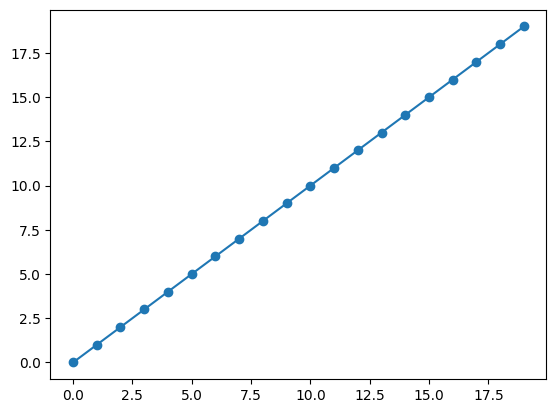

In [10]:
plt.plot(x, marker = "o")

- Plotting `y` returns the points for each value of `sin(x)`
- Crosses are the markers used

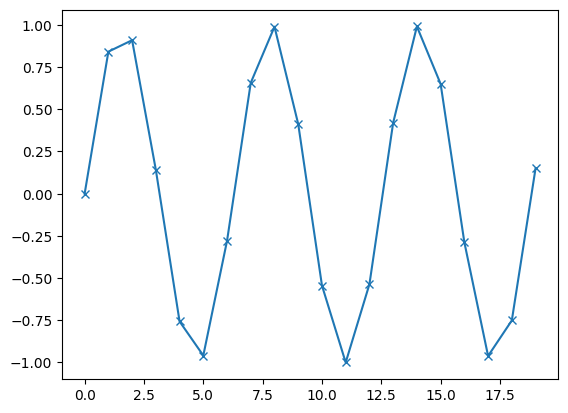

In [11]:
plt.plot(y, marker = "x")

- Why does reversing `x` and `y` change the graph?
- The same graph is returned but transformed?

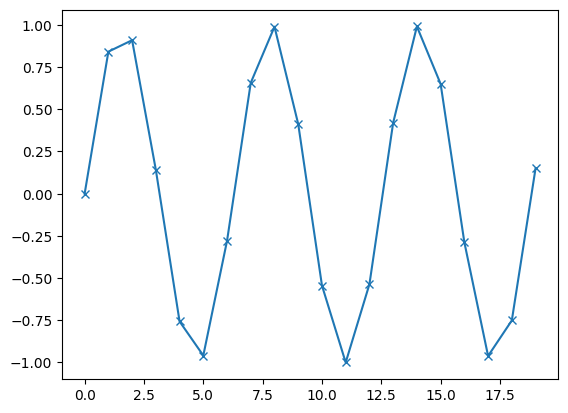

In [12]:
plt.plot(x, y, marker = "x")

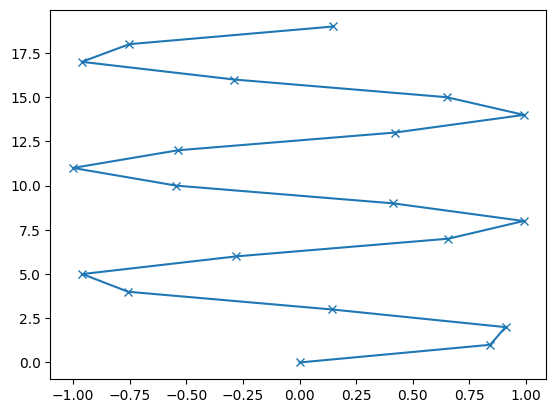

In [13]:
plt.plot(y, x, marker = "x")

## Experiments with `iris`
In this part we will go through a simple machine learning application and create our first model. A hobby botanist would like to tell the species of iris flowers that she found. She has a training set of labelled flowers. The features are the length and width of the petals, and the length and width of the sepal, all measured in centimeters. 

There are three possible labels (species): Setosa, Versicolor, or Virginica. The iris dataset is a classical dataset in machine learning and statistics, collected by Ronald A. Fisher. It is included in scikit-learn in the dataset module. 

- The `iris` dataset is a precompiled dataset 

In [14]:
from sklearn.datasets import load_iris
from sklearn.utils import Bunch # For type hinting iris return type

- Loads the `iris` dataset 
- This can be of the following types `tuple[DataFrame | ndarray, Series | DataFrame | ndarray] | Bunch`
  - It normally returns a `Bunch` which is similar to a `dict`

In [15]:
iris: Bunch = load_iris()

- As mentioned before, iris returns a `Bunch` which is similar to a `dict`
- This means that each key will have some values that it store

In [16]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

- Because `iris` is similar to a `dict`, some of the operations from a `dict` can be used
- `iris['DESCR']` finds what is stored in the `DESCR` key

In [17]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

- `target_names` is a list of strings containing the labels 
- In this case, it contains the species of flowers that need to be predicted (dependent variable)

In [18]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


- `iris['feature_names']` returns a list of descriptions for each feature

In [19]:
print(iris['feature_names'])
# print(*iris['feature_names'], sep="\n") # Print each element in a new line

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


- `iris['data']` returns the data which is the matrix of features
- `.shape` returns the shape of the matrix which is the dimensions (rows and columns)
  - For this data, the matrix is 150 by 4 meaning there are 150 rows (values) and 4 columns

In [20]:
print(iris['data'].shape) # Dimensions of the matrix
print(iris['data']) # Matrix of features

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

- Using slicing, it is possible to get a range of values (slice) from the data (matrix of features)

In [21]:
print(iris['data'][:5]) # Splice from start of list to 4th index (5 elements)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


- Contains the species of each flower that was measured
  - 0 = Setosa, 1 = Versicolor, 2 = Virginica

In [22]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- Returns the shape of the Numpy array as the dimensions of the matrix
- There are 150 rows similar similar to the number of rows in `iris['data']` 
  - This is because each target applies to the data

In [23]:
print(iris['target'].shape)

(150,)


## Visualizing Data
- It is often a good idea to visualize your data:
  - To see if the task is easily solvable without machine learning
  - Or if the desired information might not be contained in the data
- Computer screens have only two dimensions, which allows us to only plot two (or maybe three) features at a time

- The *Matrix of Features* is usually denoted with `X`
- The *Dependent Variable* vector is denoted with `y`

In [24]:
X: Bunch = iris['data'] # Matrix of Features
y: Bunch = iris['target'] # Dependent Variable Vector

- The axis are `sepal_length` and `petal length`
- `X[:, 0]` denotes 
  - Everything from the start to the end of the Matrix of Features `X`
  - `, 0` serves as proxy for the size of sepals
  - `, 2` serves as proxy for the size of petals
- `c=y` denotes:
  - `c` = colour
  - `y` = vector of labels
- `s=60` denotes the size of the dots

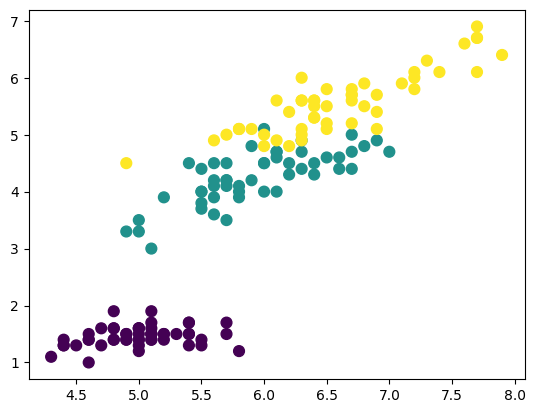

In [25]:
plt.scatter(X[:, 0], X[:, 2], c=y, s=60)

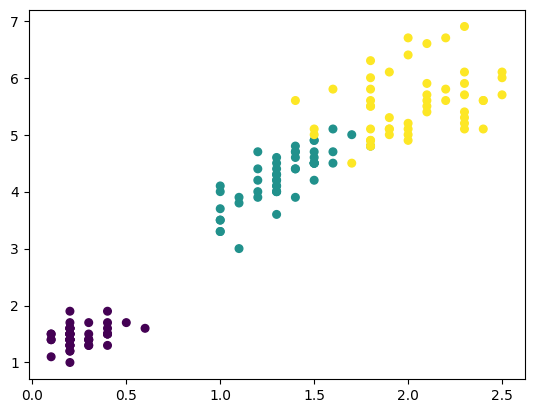

In [26]:
plt.scatter(X[:, 3], X[:, 2], c=y, s=30)

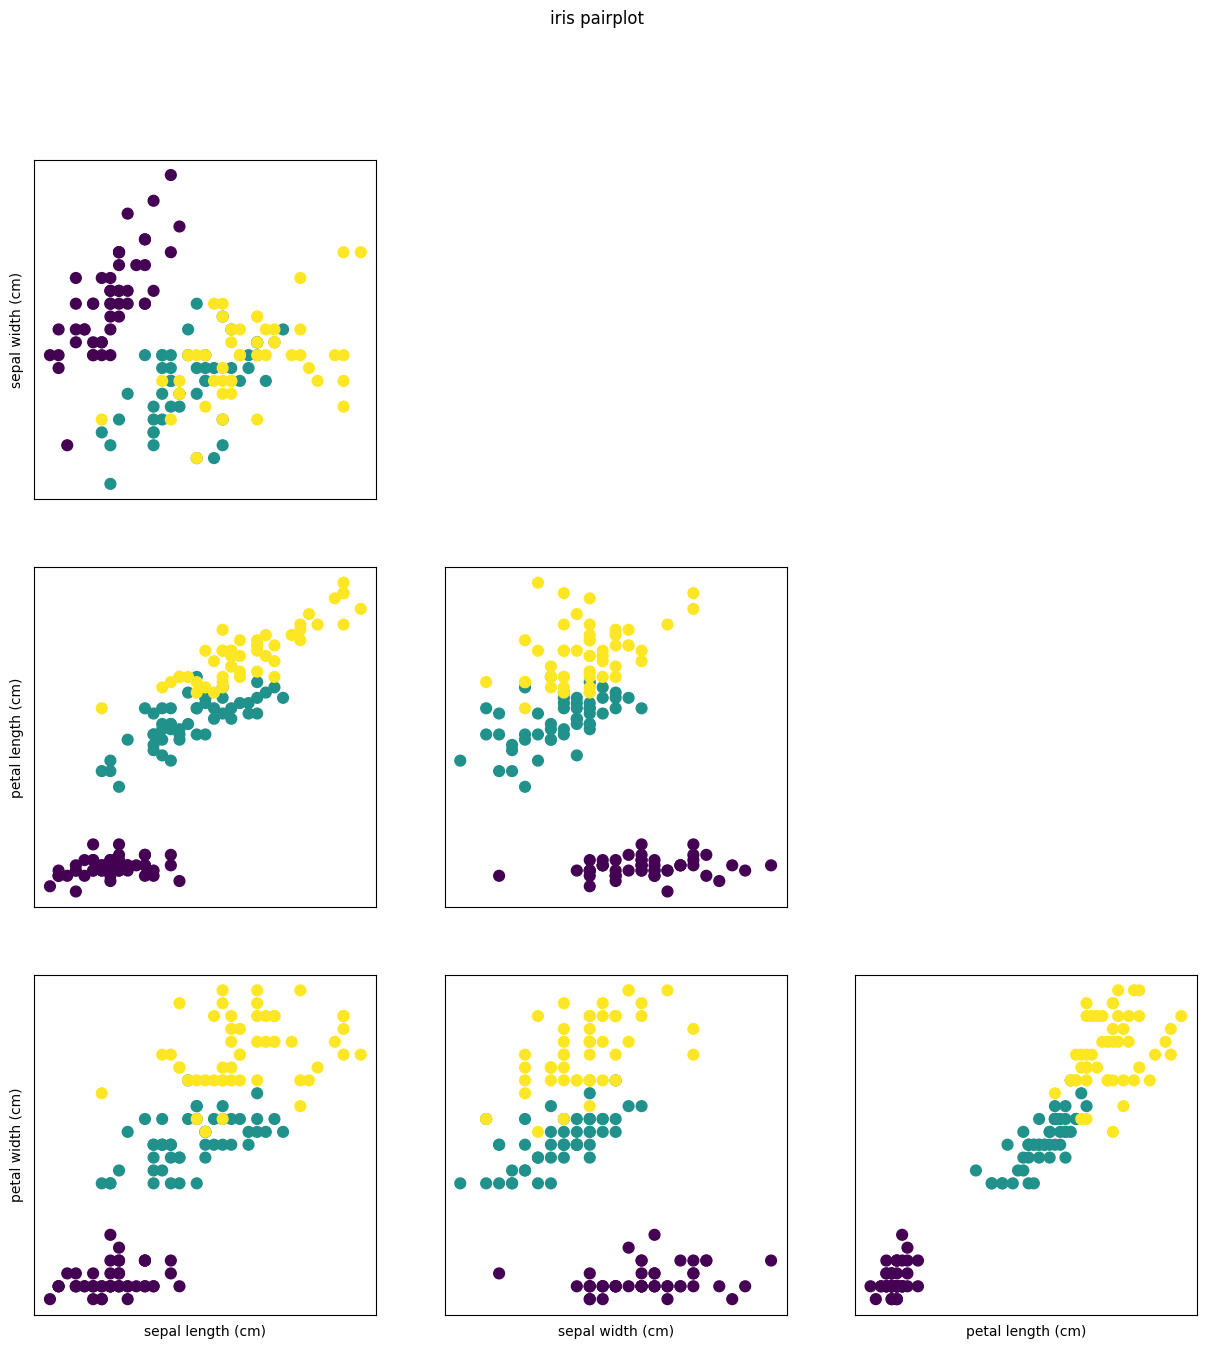

In [27]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15)) # Create a 3x3 grid of subplots
plt.suptitle("iris pairplot") # Add a title to the figure

for i in range(3): # For each row
	for j in range(3): # For each column
		ax[i,j].scatter(X[:,j], X[:,i+1], c=y, s=60) # Scatter plot on the (i,j)th subplot
		ax[i,j].set_xticks(()) # Remove ticks from the x-axis
		ax[i,j].set_yticks(()) # Remove ticks from the y-axis
		if i == 2: # If we are on the last row
			ax[i,j].set_xlabel(iris['feature_names'][j]) # Add label to the x-axis
		if j == 0: # If we are on the first column
			ax[i,j].set_ylabel(iris['feature_names'][i+1]) # Add label to the y-axis
		if j > i:
			ax[i,j].set_visible(False) # Hide upper triangular subplot
		

In [28]:
print(len(fig.axes)) # Number of axes in the figure
print(len(fig.axes) - len(fig.get_axes())) # Number of invisible axes

9
0


# Exercises

## Question 1
Is the guess that features 0 and 2 are almost as informative as all four features correct? Or, at least, can we say that features 0 and 2 are as informative as any other pair of features? Draw scatter plots for other pairs of features, and write your conclusions in your Jupyter notebook. 

- It is possible to draw plots similar to that in [Visualizing Data](#visualizing-data) `In [37]` or consult the composite plot in `In [39]` 
- The pair (0, 2), which is (sepal length, sepal width) would be good
	- Alternatively, (petal length, petal width) could potentially be a better option

## Question 2
This is a difficult exercise. What is going on in the third listing of Section 4 (the one with two nested for loops)? Add a brief explanation to the Jupyter notebook for this lab. If needed, use the `help` command (such as
`help(plt.subplots)`)

- The loop goes over 16 plots (scatter plots of feature `i` over/compared to feature `j`)
  - To avoid redundancy, not all the plots were made visible; for example feature `i` against feature `i`
- Not all the axes need to be labeled which is why the if statements are used
  - Last row and first column have labels the x-axis and y-axis respectively 

## Question 3
If you have done the previous exercise, this exercise is optional for you. Try all code discussed in the lectures.

In [29]:
x = int(input("Please enter an integer: "))
if x < 0:
  x = 0
  print('Negative changed to zero')
elif x == 0:
  print('Zero')
elif x == 1:
  print('Single')
else:
  print('More')

More


In [30]:
for i in range(3):
	print(i)

0
1
2


# Quiz

## Question 1
What will be the output of the following commands in Python/NumPy?

In [31]:
x = np.array([[2,5,1],[0,4,2]])
print(x[1,1]-x[0,0])

2


## Question 2
What will be the output of the following commands in Python/NumPy?

In [32]:
x = np.arange(33)
print(x[1]+x[-1])

33


## K-Nearest Neighbour Algorithm

In [33]:
def get_neighbors(data: list[tuple[int]], test: tuple[int], k: int) -> list[tuple[int]]:
	"""Finds the list of nearest neighbors relative to the test point. 

	Args:
		data (list[tuple[int]]): list of points in the dataset
		test (tuple[int]): test point to be compared to for distance
		k (int): number of nearest neighbors

	Returns:
		list: list of neighbors
	"""
	distances: list[tuple] = []
	for point in data: # for each point in the data set
		distance = get_distance(test, point) # calculate the distance between the test point and the point in the data set
		distances.append((point, distance)) # add tuple of point and distance to distances list
	distances.sort(key=lambda tup: tup[1]) # sort by distance in ascending order
	neighbors: list[tuple[int]] = [] # list of neighbors (currently empty)
	for i in range(k): # for each neighbor
		neighbors.append(distances[i][0]) # add the point to the neighbors list
	return neighbors

def get_distance(test: tuple[int], point: tuple[int]) -> float:
	"""Calculates the distance between the test point and the point in the data set.

	Args:
		test (tuple[int]): test point to be compared to for distance
		point (tuple[int]): point in the data set to be compared to for distance

	Returns:
		float: distance between the test point and the point in the data set
	"""
	distance = 0
	# for i in range(len(test)):
	# 	distance += (test[i] - point[i])**2
	for i, j in enumerate(test):
		distance += (j - point[i])**2 
	return distance**0.5

def get_prediction(neighbors: list) -> int:
	"""Gets the prediction based on the neighbors.
	
	Args:
		neighbors (list): list of neighbors

	Returns:
		int: prediction
	"""
	return neighbors[0][-1]

def execute(data: list[tuple[int]], test: tuple[int], k: int) -> int:
	"""Executes the k-Nearest Neighbor algorithm on the given dataset, test and k.

	Args:
		data (list[tuple[int]]): list of points in the dataset
		test (tuple[int]): test point to be compared to for distance
		k (int): number of nearest neighbors

	Returns:
		int: prediction
	"""
	neighbors = get_neighbors(data, test, k)
	prediction = get_prediction(neighbors)

	print(f"Data: {data}")
	print(f"Test: {test}")
	print(f"K: {k}")
	print(f"Neighbors: {neighbors}")
	print(f"Prediction: {prediction}")

## Question 3
Consider the training set
- (0,0) with label 7
- (0,2) with label 2
- (1,2) with label 5
- (0,3) with label 2

and a test sample (1,1). Calculate its classification using the K Nearest Neighbours algorithm with Euclidean distance, where K = 1.

In [34]:
data = [(0, 0, 7), (0, 2, 2), (1, 2, 5), (0, 3, 2)]
test = (1, 1)
k = 1
execute(data, test, k)

Data: [(0, 0, 7), (0, 2, 2), (1, 2, 5), (0, 3, 2)]
Test: (1, 1)
K: 1
Neighbors: [(1, 2, 5)]
Prediction: 5


## Question 4
Consider the training set
- (0,0) with label 1
- (0,2) with label 1
- (1,2) with label 0
- (0,3) with label 0

and a test sample (1,1). Calculate its classification using the K Nearest Neighbours algorithm with Euclidean distance, where K = 3.

In [35]:
data = [
	(0, 0, 1), 
	(0, 2, 1), 
	(1, 2, 0), 
	(0, 3, 0)
	]
test = (1, 1)
k = 3
execute(data, test, k)

Data: [(0, 0, 1), (0, 2, 1), (1, 2, 0), (0, 3, 0)]
Test: (1, 1)
K: 3
Neighbors: [(1, 2, 0), (0, 0, 1), (0, 2, 1)]
Prediction: 0


## Question 5
- Predicting tomorrow's maximum temperature is an example of *supervised* learning.
- Outlier detection is an example of *unsupervised* learning.
- Recognizing whether a face is male or female is an example of *supervised* learning.
- Dividing shoppers into distinct classes (without knowing the classes in advance) is an example of *unsupervised* learning.
- Deciding whether a set of points in a multidimensional space live in a low-dimensional subspace is an example of *unsupervised* learning.

## Question 6
The problem of predicting the maximum temperature for tomorrow is an example of a classification problem.  
- *False*

## Question 7
This question is about the third listing of Section 4 (the one with two nested for loops) in Lab 1.
- How many visible axes objects are there?  *6*
How many axes objects are invisible?  *3*

# Revision Questions

## Question 1
Give two examples of practical problems that can be solved using machine learning.

- Image and speech recognition 
- Medical diagnosis 
- Statistical predictions
- Predictive analysis

## Question 2
Describe briefly the structure of Bunch objects in scikit-learn.

`Bunch` is a data structure similar to a dictionary (`dict`) which is used to represent data similar to a table with each column being labelled and having arrays of data. 

## Question 3
What is the typical use of Bunch objects in scikit-learn?

It is used to store datasets in an organized fashion similar to tables with labeled columns and data for each label. 

## Question 4
What will be the output of the following commands in Python/NumPy?

In [36]:
x = np.array([[1,2,3],[4,5,6]])
x1, x2 = x[1, 1], x[0, 0]
print(f"{x1} - {x2} = {x1-x2}")

5 - 1 = 4


`4` because `[1, 1] = 5` and `[0, 0] = 1` so `5 - 1 = 4`. 

## Question 5
What will be the output of the following commands in Python/NumPy?

In [37]:
x = np.arange(12) # 0 to 11
x[1] + x[-1] # 1 + 11 = 12
print(f"{x[1]} + {x[-1]} = {x[1] + x[-1]}")

1 + 11 = 12


`x[1] = 1` and `x[-1] = 11` (first element from the end / last element). `1 + 11 = 12` 

## Question 6
What do you think will be the output of the following commands in
Python? Why?

In [38]:
for i in range(3):
	print(i)

0
1
2


- It will print 0, 1, 2. 
- The for `loop` will iterate over the range sequence type which contains 3 elements, 0, 1, and 2
- For each element in `range(3)`, the current value of the iteration will be printed

## Question 7
Give two examples of practical problems of supervised machine learning and identify samples, labels, and labelled samples for them.

1. A company wants to build a machine learning model to predict which of its customers will churn (i.e. stop being customers). The company has historical data on its customers, including whether or not they churned. The data is an example of a supervised machine learning problem, with the labels being "churned" or "not churned" and the features being the customer's history with the company.
2. A bank wants to build a machine learning model to predict which of its loan applicants will default on their loans. The bank has historical data on its loan applicants, including whether or not they defaulted. The data is an example of a supervised machine learning problem, with the labels being "defaulted" or "not defaulted" and the features being the loan applicant's history with the bank.

## Question 8

What is meant by a classification problem in machine learning?  

- A classification problem is about predicting discrete data such as predicting labels or classes (for example, "dog" or "cat") from a set of input features 

When is a classification problem called binary?

- A binary classification problem is where there are 2 labels which are mutually exclusive classes
- For example "cat" "not a cat"

When is it called multi-class?

- A multi-class classification problem is when there are more than 2 labels/classes
- For example "dog", "donkey", "bird"

## Question 9
What is meant by a regression problem in machine learning?

- A regression problem is about predicting continuous data from a set of input features
- For example, the future price of a product based on history

## Question 10
Give two practical examples of classification problems.

- Determining (labelling) whether an animal is a dog or cat based on its features

## Question 11
Give two practical examples of binary classification problems.

1. Classifying whether an email is spam or not spam
2. Classifying whether a tumor is benign or malignant

## Question 12
Give two practical examples of online learning problems.

- Online learning is a type of machine learning where the model is trained on data that arrives in a stream, such as stock prices or weather data.

1. Learning to predict the stock market
2. Learning to play a video game

## Question1 13
Give two practical examples of regression problems.

1. Predicting the future price of a product based on history 
2. Predicting the temperature 

## Question 14

What is meant by a feature in machine learning?

- Features, sometimes called matrix of features, are a collections of gathered data inputted into a machine learning model
- Features can be the historical trends of stocks

 What is the difference between discrete and continuous features?

- Discrete data is used in classification models to predict labels or classes 
  - For example, inputting the colours of flowers and predicting the race of another flower based on its colours
- Continuous data is used in regression models to predict the continuous variations
  - For example, predicting the height of a flower based on past heights  

## Question 15
Define the batch learning protocol.

- Batch learning is a type of machine learning where the model is trained on all of the available data at once. 
- This is the most common type of machine learning.

## Question 16
Define the online learning protocol.

- Online learning is a type of machine learning where the model is trained on data that arrives in a stream
- For example, stock prices or weather data

## Question 17
Give two practical examples of batch learning problems.

1. Training a spam filter
2. Training a self-driving car

## Question 18
Give two practical examples of online learning problems.

1. Learning to predict the stock market
2. Learning to play a video game

## Question 19
What is meant by exploration and exploitation in machine learning?

- **Exploration** is the process of trying new things in order to find out what works best
- **Exploitation** is the process of using what you already know to get the best results

## Question 20
Give the definition of induction in machine learning

- **Induction** is the process of using a set of training data to build a model, and then using that model to make predictions on new data

## Question 21
Give the definition of transduction in machine learning.

- **Transduction** is the process of using a set of training data to build a model, and then using that model to make predictions on the same set of data.

## Question 22
What is the IID assumption in machine learning?

- The IID assumption is that the training data is independent and identically distributed
- This means that the data points are independent of each other and that they are all drawn from the same distribution

## Question 23
What is unsupervised learning?

- **Unsupervised learning** is a type of machine learning where the goal is to learn a model from data without any labels or supervision
- **Supervised learning** is a type of machine learning where the goal is to learn a model from labeled data

## Question 24
Give two practical examples of unsupervised learning.

1. Clustering data points into groups
2. Dimensionality reduction

## Question 25
Define the Euclidean distance between two samples.

- The **Euclidean distance** between two samples is the straight-line distance between them
- Can be worked out using Pythagoras' theorem

## Question 26
Define the Nearest Neighbour algorithm.

- The **Nearest Neighbour algorithm** is a method for classification that predicts the label of a new data point by finding the closest data point in the training data and using its label

## Question 27
Write Python code (or pseudocode) for the Nearest Neighbour algorithm.

1. For each data point in the test data:
2. Find the closest data point in the training data
3. Use the label of the training data point
4. Return the most common label

[Python Code](#k-nearest-neighbour-algorithm)

## Question 28
What is the difference between the Nearest Neighbour algorithm for classification and the Nearest Neighbour algorithm for regression?

- The Nearest Neighbour algorithm for classification predicts the label of a new data point by finding the closest data point in the training data and using its label
- The Nearest Neighbour algorithm for regression predicts the value of a new data point by finding the closest data point in the training data and using its value

## Question 29
Describe the K Nearest Neighbours algorithm for classification.

- The **K Nearest Neighbours algorithm** for classification predicts the label of a new data point by finding the `K` number of closest data points in the training data and using their labels

## Question 30
What is meant by positive and negative samples in machine learning?

- **Positive samples** are data points that belong to the class that you are trying to predict
- **Negative samples** are data points that do not belong to the class that you are trying to predict

## Question 31
Consider the training set
- positive: (1, 2, 3, 0)
- positive: (1, 4, 2, 3)
- negative: (−2, 3, −4, 3)
- negative: (−1, 1, −3, 2)

and a test sample (0, 1, 0, 1). Calculate its classification using the K Nearest Neighbours algorithm with Euclidean distance, first for K = 1 and then for K = 3.

- For `K = 1`, the closest training point is `(1, 2, 3, 0)`, which is positive, so the test point is classified as positive.
- For `K = 3`, the closest training points are `(1, 2, 3, 0)`, `(1, 4, 2, 3)`, and `(−2, 3, −4, 3)`, which are two positive and one negative. The majority of the closest points are positive, so the test point is classified as positive.

## Question 32
Describe the K Nearest Neighbours algorithm for regression.

- The K Nearest Neighbours algorithm for regression predicts the value of a new data point by finding the K closest data points in the training data and using their values

## Question 33
Consider the following regression problem. The training set is as follows:
- positive: (1, 2, 3, 0)
- positive: (1, 4, 2, 3)
- negative: (−2, 3, −4, 3)
- negative: (−1, 1, −3, 2)

and a test sample (0, 1, 0, 1). Calculate its classification using the K Nearest Neighbours algorithm with Euclidean distance, first for K = 1 and then for K = 3.

- For `K = 1`, the closest training point is `(1, 2, 3, 0)`, so the predicted value for the test point is 0.
- For `K = 3`, the closest training points are `(1, 2, 3, 0)`, `(1, 4, 2, 3)`, and `(−2, 3, −4, 3)`. The average of the values of these points is `1`, so the predicted value for the test point is `1`.

## Question 34
Consider the following training set: crosses at −4, −3, −2, and −1; noughts at 2, 4, 6, and 8. Sometimes the prediction obtained using the 1 Nearest Neighbour algorithm is different from the prediction obtained using the 3 Nearest Neighbours algorithm. For the given training set above, find the maximal interval for the new test point where the two
predictions would be different.

- The two predictions would be different for values of the new test point between -1 and 2.
- The 1NN prediction would be "cross", while the 3NN prediction would be "nought"
  - This is because there are more noughts than crosses in the training data, so the 3NN algorithm would predict the majority class, which is nought.

## Question 35
Consider the training set
| Sample  | Classification  |
| -----------  | -----------  |
| 0 | +1|
| 2 | -1 |
| 6 | +1 |
| 10 | -1 |

### Part A
Draw the training samples on the straight line and highlight the regions of test samples that are classified as positive by the Nearest Neighbour algorithm.

### Part B
Highlight the regions of test samples that are classified as negative by the 3 Nearest Neighbours algorithm.

## Question 36
Would you classify the K Nearest Neighbours algorithm as induction or transduction? Explain briefly why.

- The K Nearest Neighbours algorithm is classified as transduction because it makes predictions on the same set of data that it was trained on.

## Question 37
What is the computational complexity of the K Nearest Neighbours algorithm? Give a brief explanation.

- The computational complexity of the K Nearest Neighbours algorithm is O(N * K), where N is the number of data points and K is the number of closest data points. This is because the algorithm has to compute the distance between the new data point and all of the training data points.

## Question 38
Give three examples of distances that can be used in the K Nearest Neighbours algorithm.

1. Euclidean distance
2. Manhattan distance
3. Cosine similarity

## Question 39
Give three examples of practical application of the K Nearest Neighbours algorithm.

1. Classifying whether an email is spam or not spam
2. Classifying whether a tumor is benign or malignant
3. Predicting the price of a stock

## Question 40
Give two advantages and two disadvantages of the K Nearest Neighbours algorithm.

*Advantages:*
- Simple to implement
- Works with any number of classes

*Disadvantages:*
- Can be slow for large datasets
- Can be sensitive to outliers